<a href="https://colab.research.google.com/github/Komsomolochka/open_data_battle_2021/blob/main/covid19/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
#загружаем данные
df = pd.read_csv('/content/covid-19cases.csv',  index_col = 0, parse_dates=['date'])

In [3]:
df.head()

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 40,Unnamed: 41,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,18.733,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
1,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
3,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,37.465,18.733,2.676,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0


Произвести очистку данных, убрав пустые столбцы и неинформативные строки (строки, выделенные для заметок for Notes)

In [14]:
#проверяем заполненность столбцов
df.isna().sum()/df.shape[0]

date                               0.000000
continent                          0.505721
location                           0.500009
total_cases                        0.534185
new_cases                          0.508464
new_cases_smoothed                 0.515972
total_deaths                       0.618688
new_deaths                         0.508464
new_deaths_smoothed                0.515972
total_cases_per_million            0.536700
new_cases_per_million              0.509069
new_cases_smoothed_per_million     0.516587
total_deaths_per_million           0.621061
new_deaths_per_million             0.509069
new_deaths_smoothed_per_million    0.516587
total_tests                        0.810805
new_tests                          0.812346
total_tests_per_thousand           0.810805
new_tests_per_thousand             0.812346
new_tests_smoothed                 0.789878
new_tests_smoothed_per_thousand    0.789878
tests_per_case                     0.805802
positive_rate                   

In [15]:
#удаляем пустые столбцы
del df['Unnamed: 40']
del df['Unnamed: 41']

In [16]:
#оставляем только столбцы без "For Notes:"
df = df[df['date'].str.contains("For Notes:")==False]

Определить статистику случаев заражения в разных частях света (столбец continent) за каждый месяц

In [17]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [18]:
#создаем колонку "месяц"
df['month'] = df['date'].dt.month

In [19]:
#группировка
month_continents = df.groupby(['continent','month'], as_index=False).aggregate({'total_cases':'sum'})

In [20]:
month_continents

,continent,month,total_cases
0,Africa,1,4259251.0
1,Africa,2,4314060.0
2,Africa,3,4399454.0
3,Africa,4,4856686.0
4,Africa,5,6395868.0
...,...,...,...
67,South America,8,130420800.0
68,South America,9,159751434.0
69,South America,10,160095433.0
70,South America,11,24723908.0


In [32]:
#сводная таблица
pivot_table = pd.pivot_table(month_continents, index=["month"], values=['total_cases'], columns=['continent'])

Определить корреляцию каждой части света с другой.

In [33]:
#считаем корреляции
pivot_table.corr()

total_cases            ...                        
continent                      Africa      Asia  ...   Oceania South America
            continent                            ...                        
total_cases Africa           1.000000  0.979365  ...  0.976969      0.996659
            Asia             0.979365  1.000000  ...  0.969920      0.991577
            Europe           0.941640  0.960550  ...  0.962896      0.952654
            North America    0.992009  0.975686  ...  0.988368      0.990744
            Oceania          0.976969  0.969920  ...  1.000000      0.978338
            South America    0.996659  0.991577  ...  0.978338      1.000000

[6 rows x 6 columns]

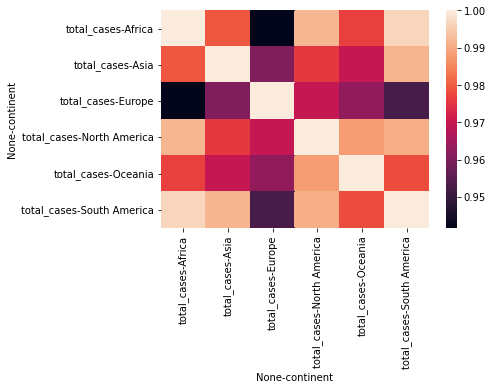

In [24]:
#строим тепловую карту корреляций
sns.heatmap(pivot_table.corr())

Вывести название части света, которая меньше всего коррелирует с другими

In [41]:
cor = pivot_table.corr()

In [47]:
#считаем самое маленькое значение коэффициента корреляции 
cor.mean().sort_values().head(1)

             continent
total_cases  Europe       0.964644
dtype: float64

*Ответ: Европа*